In [1]:

# The dataset related to USA home pricing contains several key economic and housing market indicators. 
# Each column represents a specific variable, providing insights into factors that influence the dynamics of the real estate market. 
# Here's a brief description of each column:

# 1. UNEM_RATE (Unemployment Rate): This column likely represents the percentage of the labor force that is unemployed and actively seeking employment. The unemployment rate is a crucial economic indicator, as changes in employment levels can impact the demand for housing.

# 2.MORTGAGE (Mortgage Rates): This column probably represents the average interest rates on mortgages. Mortgage rates play a significant role in influencing housing affordability and the demand for real estate. Lower mortgage rates generally stimulate homebuying activity.

# 3.GDPC1 (Gross Domestic Product): This column likely represents the Gross Domestic Product, a measure of the total economic output of the United States. Changes in GDP can reflect the overall economic health of the country and influence housing market trends.

# 4.FORECLOSURES: This column likely provides information on the number of foreclosures. Foreclosure rates are essential indicators of the health of the housing market, as an increase in foreclosures may signal economic challenges and impact home prices.

# 5.HPI (Home Price Index): The HPI column likely represents the Home Price Index, a measure tracking changes in residential property prices over time. The Home Price Index is crucial for assessing the overall trends and fluctuations in the housing market.

# 6.POPULATION:Represents the total number of residents in the USA.
# Demographic factor influencing housing demand, as population growth can drive the need for additional housing and impact regional market dynamics.    

# In summary, this dataset captures a comprehensive view of the USA housing market by including indicators related to 
# employment, mortgage rates, economic output, foreclosure rates, and home prices. 
# Analyzing this dataset can provide valuable insights into the factors influencing home pricing dynamics in the United States.

In [1]:
#Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the data
df=pd.read_csv("demand_data.csv")
df

,DATE,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI,POPULATION
0,01-01-2000,4.03,8.26,12935.252,1.95,101.34,178143000
1,01-04-2000,3.93,8.32,13170.749,1.97,103.67,178578000
2,01-07-2000,4.00,8.02,13183.890,2.09,105.79,179227000
3,01-10-2000,3.90,7.62,13262.250,2.23,108.27,179811000
4,01-01-2001,4.23,7.01,13219.251,2.34,110.48,180310000
...,...,...,...,...,...,...,...
79,01-10-2019,3.60,3.70,19202.310,2.34,212.47,206344000
80,01-01-2020,3.80,3.52,18951.992,2.36,215.51,205690000
81,01-04-2020,13.07,3.24,17258.205,2.55,217.89,205694000
82,01-07-2020,8.80,2.95,18560.774,2.80,222.84,205745000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          84 non-null     object 
 1   UNEM_RATE     84 non-null     float64
 2   MORTGAGE      84 non-null     float64
 3   GDPC1         84 non-null     float64
 4   FORECLOSURES  84 non-null     float64
 5   HPI           84 non-null     float64
 6   POPULATION    84 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 4.7+ KB


In [4]:
df.describe()

,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI,POPULATION
count,84.000000,84.000000,84.000000,84.000000,84.000000,8.400000e+01
mean,5.986667,5.092381,15968.048810,4.745119,161.669405,1.966957e+08
std,1.976243,1.324841,1762.701831,3.290622,30.778158,8.568912e+06
min,3.600000,2.760000,12935.252000,1.410000,101.340000,1.781430e+08
25%,4.552500,3.942500,14821.741750,2.097500,140.495000,1.903315e+08
50%,5.430000,4.885000,15768.528500,3.160000,162.240000,1.989690e+08
75%,7.005000,6.135000,17394.926250,7.517500,182.945000,2.041780e+08
max,13.070000,8.320000,19202.310000,11.540000,232.550000,2.067330e+08


In [5]:
#Missing Values:-
df.isnull().sum()


DATE            0
UNEM_RATE       0
MORTGAGE        0
GDPC1           0
FORECLOSURES    0
HPI             0
POPULATION      0
dtype: int64

In [6]:
num_df=pd.DataFrame()
num_df['Q1']=df.quantile(0.25)
num_df['Q2']=df.quantile(0.50)
num_df['Q3']=df.quantile(0.75)
num_df['Max']=df.max()
num_df['Min']=df.min()

In [7]:
# 5 point summary:-
num_df

,Q1,Q2,Q3,Max,Min
UNEM_RATE,4.552500e+00,5.430000e+00,7.005000e+00,13.07,3.6
MORTGAGE,3.942500e+00,4.885000e+00,6.135000e+00,8.32,2.76
GDPC1,1.482174e+04,1.576853e+04,1.739493e+04,19202.31,12935.252
FORECLOSURES,2.097500e+00,3.160000e+00,7.517500e+00,11.54,1.41
HPI,1.404950e+02,1.622400e+02,1.829450e+02,232.55,101.34
POPULATION,1.903315e+08,1.989690e+08,2.041780e+08,206733000,178143000


In [ ]:
# Checking OUTLIERS

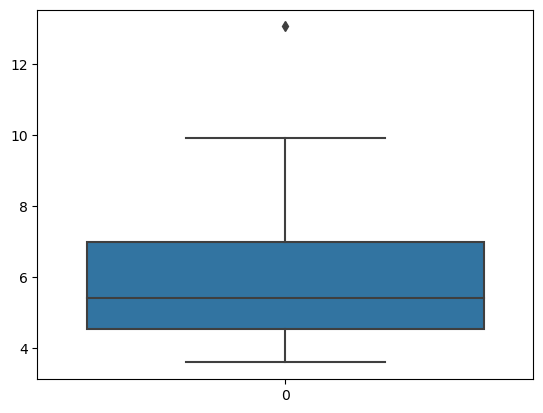

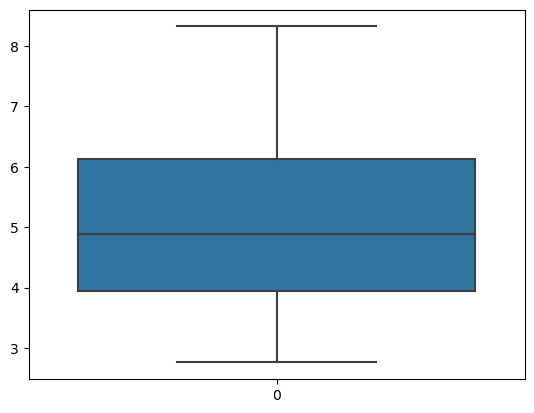

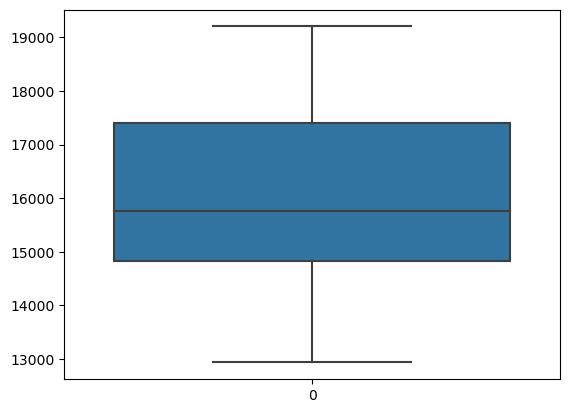

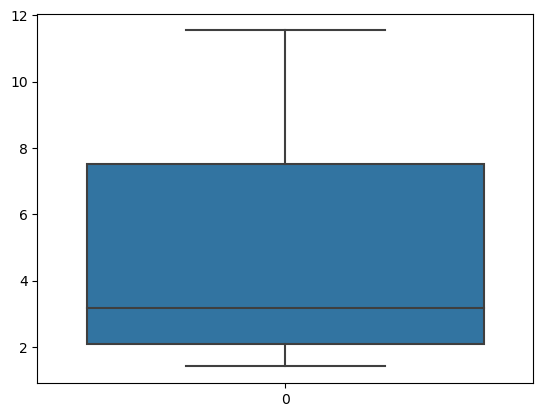

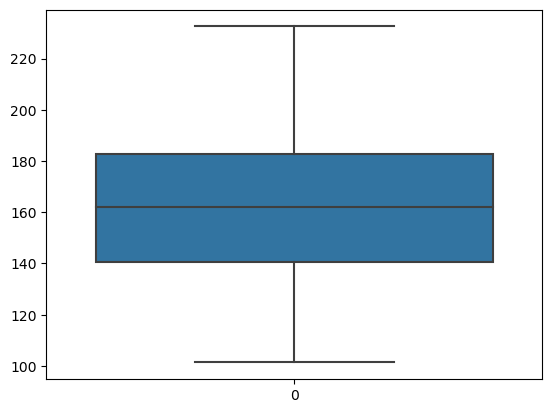

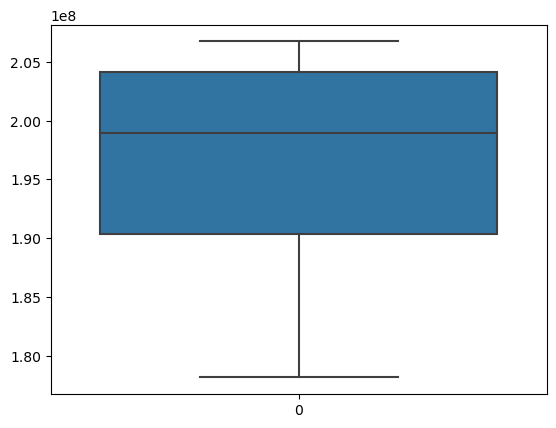

In [36]:
df=df.select_dtypes(include=np.number)
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

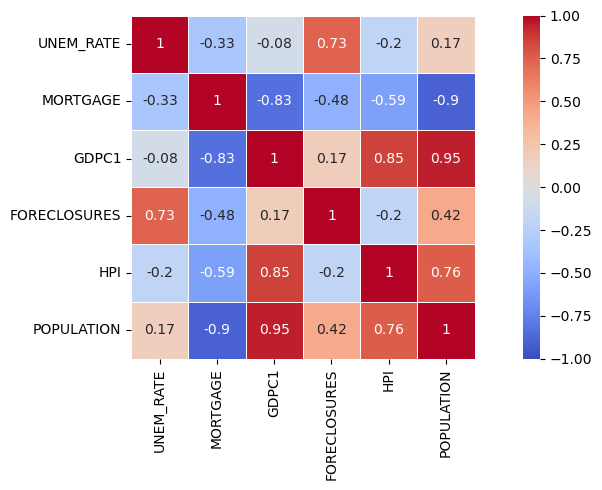

In [8]:
## Correlation

df_corr=df.corr()
ax = plt.subplots(figsize=(10, 5))
ax = sns.heatmap(df_corr,vmax=1, vmin=-1, linewidths=.5, square=True, cmap='coolwarm', annot=True)
plt.tight_layout()

In [ ]:
# GDPC1 and POPULATION having highest correlation with a value of 0.9
# GDPC1 and HPI having positive correlation with a value of 0.85
# HPI and POPULATION having positive correlation with a value of 0.76
# UNEMPLOYEMENT RATE and FORECLOSURES having positive correlation with a value 0.73

## Univariate analysis

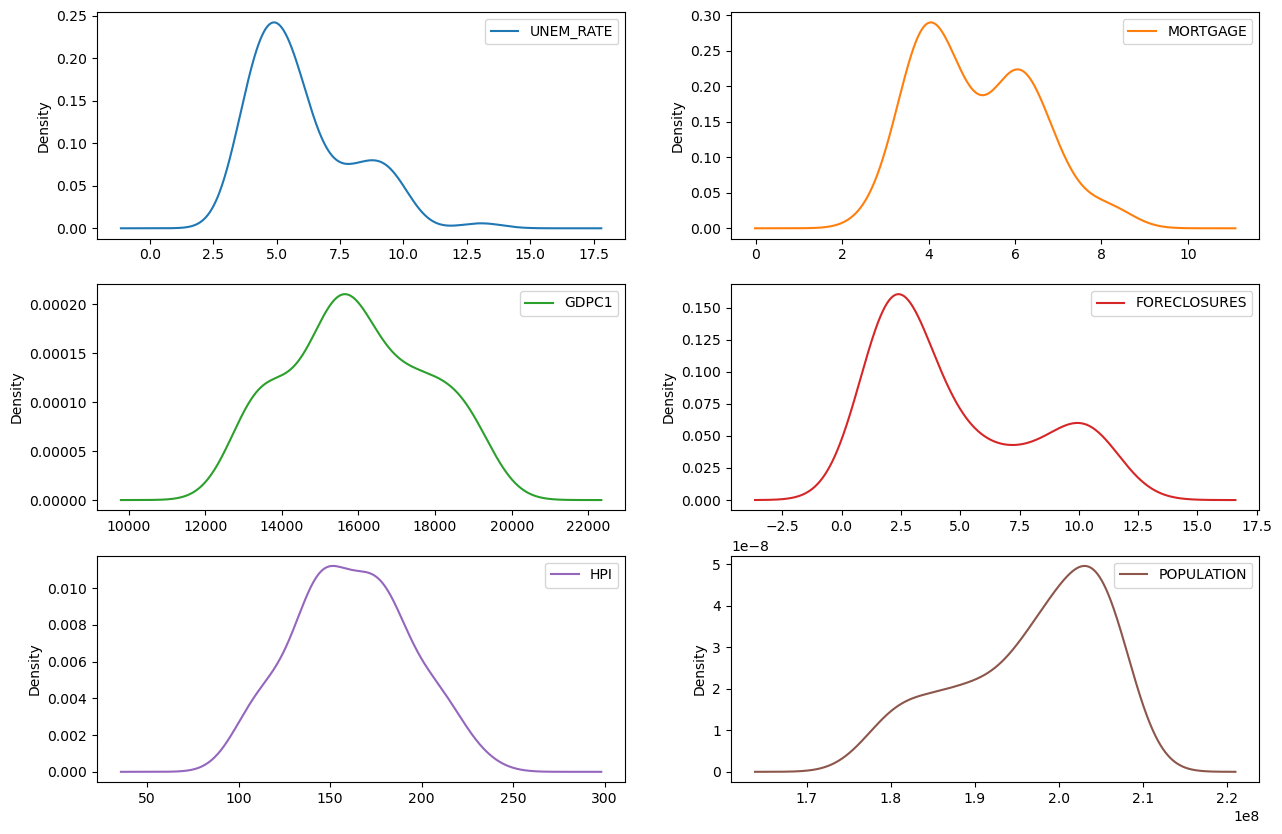

In [39]:
# Distribution plots

df.plot(kind='kde',subplots=True,layout=(3,2),sharex=False,figsize=(15,10))
plt.show()

## Bivariate Analysis

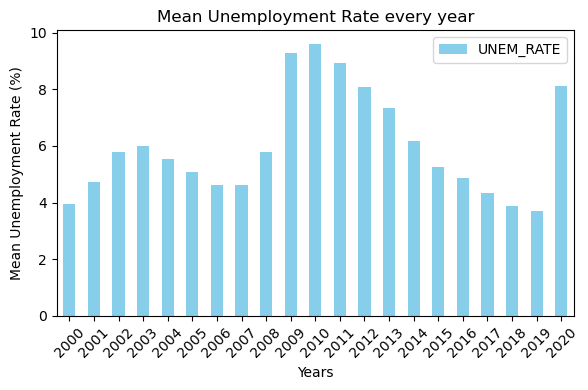

In [25]:
partitioned_df = df.groupby(df.index // 4)['DATE', 'UNEM_RATE','MORTGAGE','GDPC1','FORECLOSURES','HPI','POPULATION'].mean().reset_index()
partitioned_df['index'] = partitioned_df['index'].replace({0: 2000, 1: 2001,2:2002,3:2003,4:2004,5:2005,6:2006,7:2007,8:2008,9:2009,10:2010,11:2011,12:2012,13:2013,14:2014,15:2015,16:2016,17:2017,18:2018,19:2019,20:2020})


# Plotting the analysis graph
partitioned_df.plot(y='UNEM_RATE',x='index' ,kind='bar', color='skyblue', figsize=(6, 4))
plt.title('Mean Unemployment Rate every year')
plt.xlabel('Years')
plt.ylabel('Mean Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

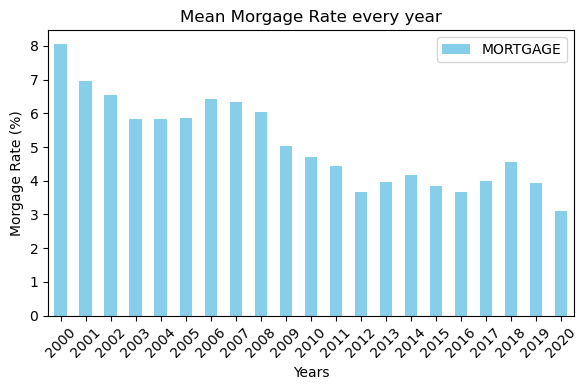

In [28]:
partitioned_df.plot(y='MORTGAGE',x='index' ,kind='bar', color='skyblue', figsize=(6, 4))
plt.title('Mean Morgage Rate every year')
plt.xlabel('Years')
plt.ylabel('Morgage Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

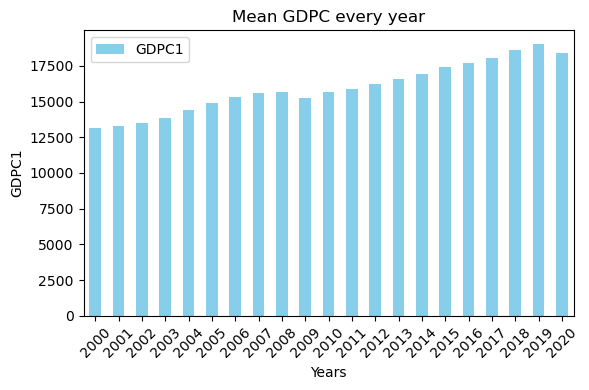

In [29]:
partitioned_df.plot(y='GDPC1',x='index' ,kind='bar', color='skyblue', figsize=(6, 4))
plt.title('Mean GDPC every year')
plt.xlabel('Years')
plt.ylabel('GDPC1')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

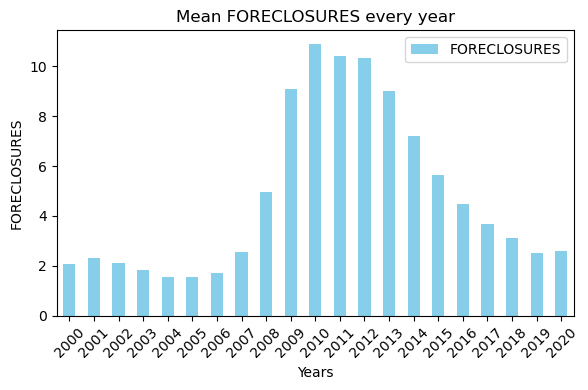

In [30]:
partitioned_df.plot(y='FORECLOSURES',x='index' ,kind='bar', color='skyblue', figsize=(6, 4))
plt.title('Mean FORECLOSURES every year')
plt.xlabel('Years')
plt.ylabel('FORECLOSURES')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

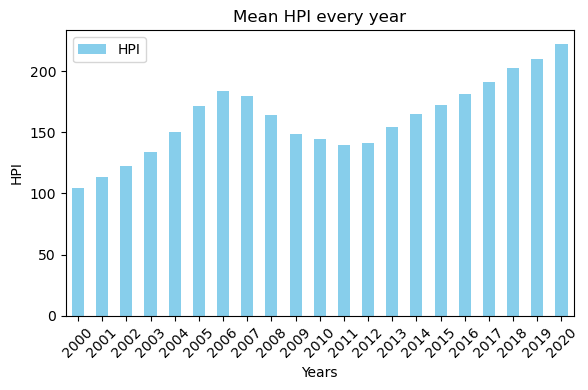

In [31]:
partitioned_df.plot(y='HPI',x='index' ,kind='bar', color='skyblue', figsize=(6, 4))
plt.title('Mean HPI every year')
plt.xlabel('Years')
plt.ylabel('HPI')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

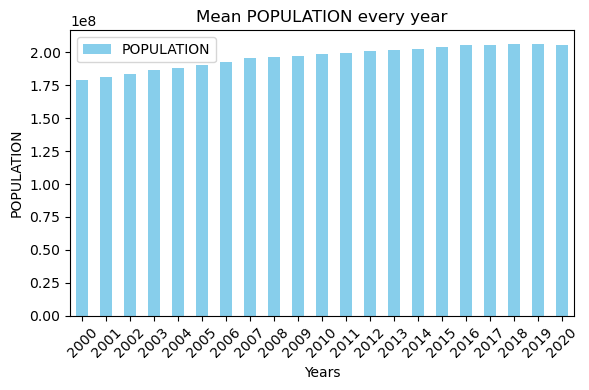

In [77]:
partitioned_df.plot(y='POPULATION',x='index' ,kind='bar', color='skyblue', figsize=(6, 4))
plt.title('Mean POPULATION every year')
plt.xlabel('Years')
plt.ylabel('POPULATION')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### Plotting graph between the features having positive correlation.

In [ ]:
# scaling the features which are large in number

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [73]:
df['scaled_POP'] = scaler.fit_transform(df[['POPULATION']])


In [74]:
df['scaled_HPI'] = scaler.fit_transform(df[['HPI']])


In [75]:
df['scaled_GDPC1'] = scaler.fit_transform(df[['GDPC1']])


<Axes: xlabel='scaled_POP'>

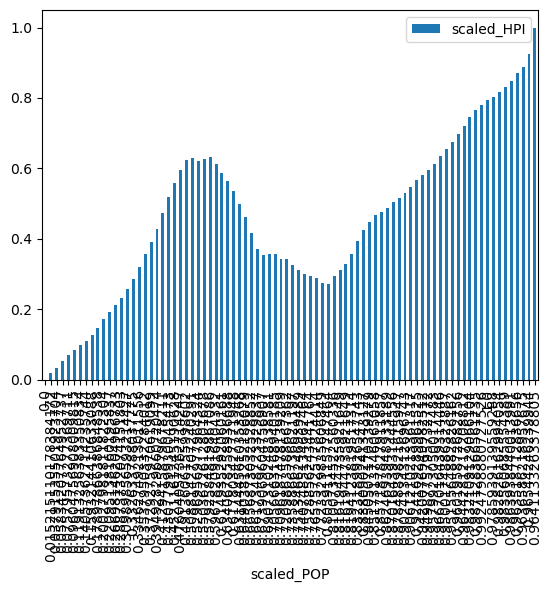

In [62]:
# POPULATION vs HPI
df.plot(x='scaled_POP',y='scaled_HPI',kind='bar')

<Axes: xlabel='scaled_HPI'>

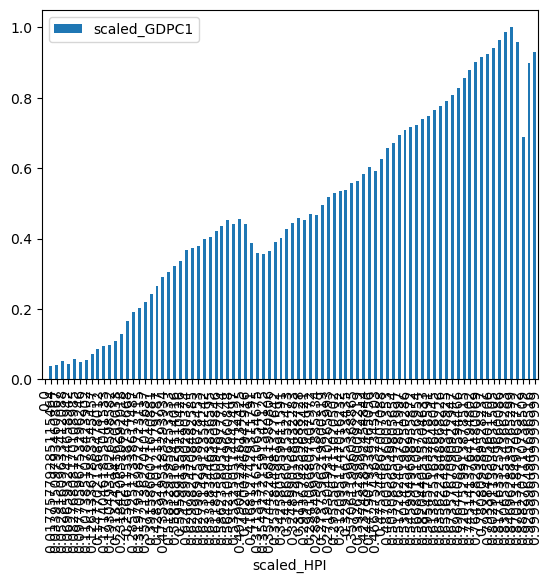

In [64]:
# GDPC1 vs HPI
df.plot(y='scaled_GDPC1',x='scaled_HPI',kind='bar')

<Axes: xlabel='UNEM_RATE'>

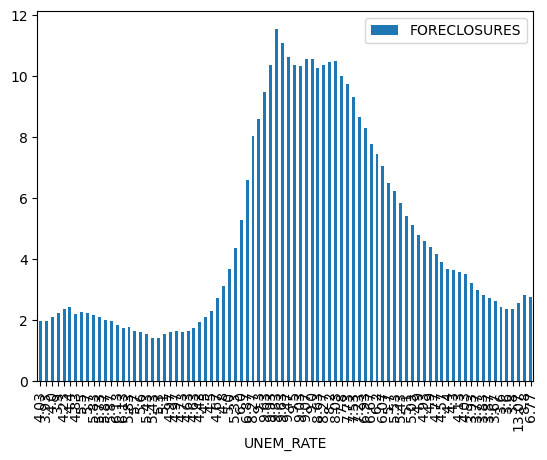

In [46]:
# UNEMPLOYEMENT RATE vs FORECLOSURE
df.plot(x='UNEM_RATE',y='FORECLOSURES',kind='bar')

<Axes: xlabel='scaled_POP'>

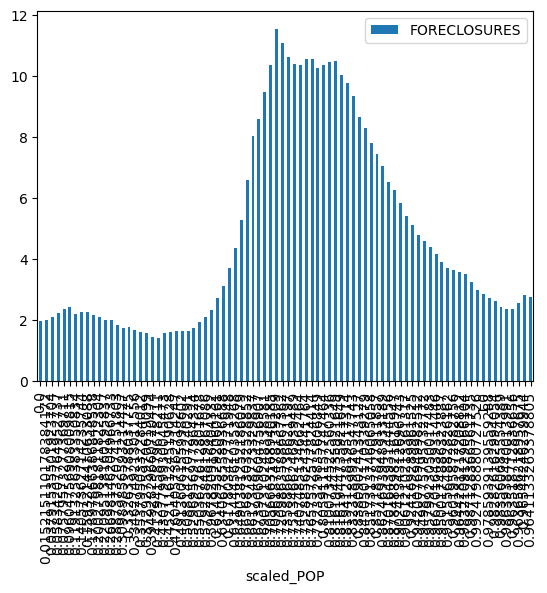

In [65]:
# FORECLOSURE vs POPULATION 
df.plot(x='scaled_POP',y='FORECLOSURES',kind='bar')

In [ ]:
### checking for the normality of the distribution.

In [66]:
from scipy.stats import levene
from scipy.stats import shapiro
for i in df.columns:
    print(i)
    print(shapiro(df[i]))

UNEM_RATE
ShapiroResult(statistic=0.8878639936447144, pvalue=2.415174094494432e-06)
MORTGAGE
ShapiroResult(statistic=0.9504804611206055, pvalue=0.0027495466638356447)
GDPC1
ShapiroResult(statistic=0.959523618221283, pvalue=0.009818694554269314)
FORECLOSURES
ShapiroResult(statistic=0.8236675262451172, pvalue=1.2991167253062486e-08)
HPI
ShapiroResult(statistic=0.9859785437583923, pvalue=0.49840259552001953)
POPULATION
ShapiroResult(statistic=0.8998228311538696, pvalue=7.652426575077698e-06)
scaled_POP
ShapiroResult(statistic=0.8998228311538696, pvalue=7.652426575077698e-06)
scaled_HPI
ShapiroResult(statistic=0.9859785437583923, pvalue=0.49840259552001953)
scaled_GDPC1
ShapiroResult(statistic=0.959523618221283, pvalue=0.009818694554269314)


In [67]:
#pvalue>0.05 so the data is normal

## Building a regression model

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [70]:
X = df[['UNEM_RATE', 'MORTGAGE', 'GDPC1', 'FORECLOSURES', 'POPULATION']]
y = df['HPI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 144.37011117871867


### Random forest

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 67.81896535176537


### Below given are the feature importance score through which we can conclude 
### POPULATION and GDPC1 are 2 most important features affecting the USA home pricing.

In [79]:
feature_importances 

POPULATION      0.394830
GDPC1           0.386521
UNEM_RATE       0.133944
FORECLOSURES    0.063631
MORTGAGE        0.021074
dtype: float64

### Decision tree

In [83]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

information_gain = pd.Series(dt_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
information_gain

POPULATION      0.537832
GDPC1           0.307668
UNEM_RATE       0.135868
FORECLOSURES    0.012195
MORTGAGE        0.006436
dtype: float64